In [9]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
ds1 = xr.open_dataset('GPS-RO__CP_LR_5x5_2007-2018.nc')
ds2 = xr.open_dataset('GPS-RO__LR-CP__gridded_ALL_MISSIONS_2002-2018.nc', decode_times=False)

In [54]:
ds2['time'] = pd.date_range('2002-01-01', '2018-12-31', freq='M')
ds1_t = ds1.resample(time='M').mean()

In [76]:
ds1_av = ds1_t.mean(axis=(1,2), keep_attrs=True)
ds1_av['time'] = ds1_t.time


In [77]:
ds2_av = ds2.mean(axis=(1,2))
ds2_av['time'] = ds2.time

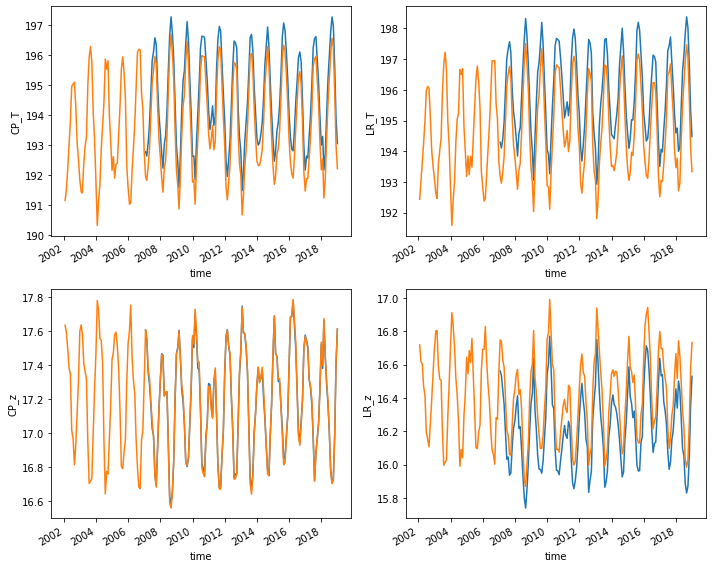

In [80]:
fig, axs = plt.subplots(2,2,figsize=(10,8))

ds1_av.CP_T.plot(ax=axs[0,0])
ds1_av.CP_z.plot(ax=axs[1,0])

ds2_av.CP_T.plot(ax=axs[0,0])
ds2_av.CP_z.plot(ax=axs[1,0])


ds1_av.LR_T.plot(ax=axs[0,1])
ds1_av.LR_z.plot(ax=axs[1,1])

ds2_av.LR_T.plot(ax=axs[0,1])
ds2_av.LR_z.plot(ax=axs[1,1])

plt.tight_layout()

In [81]:
t_slice = slice('2007-01-01', '2018-12-31')
d1 = ds1_av.CP_T - ds2_av.CP_T.sel(time=t_slice) 
d2 = ds1_av.CP_z - ds2_av.CP_z.sel(time=t_slice)
d3 = ds1_av.LR_T - ds2_av.LR_T.sel(time=t_slice)
d4 = ds1_av.LR_z - ds2_av.LR_z.sel(time=t_slice)

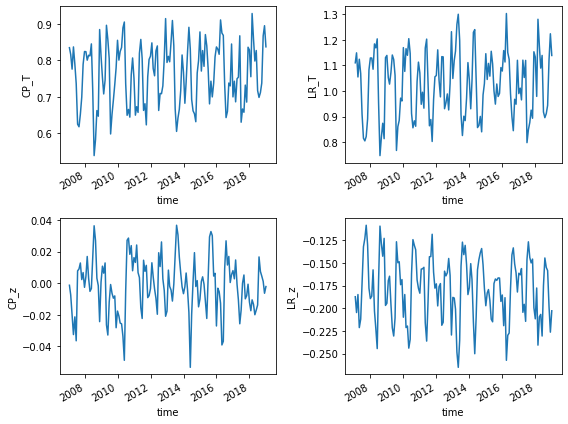

In [84]:
fig, axs = plt.subplots(2,2,figsize=(8,6))

d1.plot(ax=axs[0,0])
d2.plot(ax=axs[1,0])
d3.plot(ax=axs[0,1])
d4.plot(ax=axs[1,1])

plt.tight_layout()